In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [15]:
def read_result_file(file_path):
    with open(file_path, 'r') as f:
        results = f.readlines()

    result_dict = dict()
    k=0
    for l in results:
        l = l.strip()

        if (l.startswith('Test') and 'baseline accuracy: ' in l) or l.startswith('baseline accuracy: '):
            baseline_acc = 1 - float(l[-6:])
            result_dict['baseline_acc'] = baseline_acc
        elif l.startswith('Confidence-score accuracy: '):
            result_dict['confidence_acc'] = float(l[-6:])
        elif l.startswith('Confidence-score roc-auc: '):
            result_dict['confidence_auc'] = float(l[-6:])
        elif l=='S':
            embedding = 'S'
            result_dict[embedding] = dict()
        elif l=='F':
            embedding = 'F'
            result_dict[embedding] = {}
        elif l=='FA':
            embedding = 'FA'
            result_dict[embedding] = {}
        elif l.startswith('k='):
            k=int(l[2:])
            result_dict[embedding][k] = {}
            # result_dict['baseline_acc'][k] = {'acc': baseline_acc}
        elif l.startswith('Best_mean_accuracy:') or l.startswith('Best accuracy: '):
            result_dict[embedding][k]['acc'] = float(l.split()[-1])
        elif l.startswith('Best mean_roc_auc:') or l.startswith('Best roc_auc'):
            result_dict[embedding][k]['roc_auc'] = float(l.split()[-1])
        elif l.startswith('Best mean_precision:') or l.startswith('Best precision'):
            result_dict[embedding][k]['precision'] = float(l.split()[-1])
        elif l.startswith('Best mean_recall:') or l.startswith('Best recall'):
            result_dict[embedding][k]['recall'] = float(l.split()[-1])
        elif l.startswith('Best mean_npv:') or l.startswith('Best npv'):
            result_dict[embedding][k]['npv'] = float(l.split()[-1])
        elif l.startswith('Best mean_specificity:') or l.startswith('Best specificity'):
            result_dict[embedding][k]['spec'] = float(l.split()[-1])
    print(result_dict)
    return result_dict

In [22]:

def draw_graph(data, title, y_data = 'acc'):
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    labels = list(data.keys())
    x = list(data[labels[3]].keys())

    if y_data == 'acc':
        baseline_acc = data['baseline_acc']
        if baseline_acc < 0.5:
            baseline_acc = 1-baseline_acc
        confidence_acc = data['confidence_acc']
        plt.plot(x, [baseline_acc] * len(x), linestyle='-', color = colors[-2], label='baseline acc.', marker='o')
        plt.plot(x, [confidence_acc] * len(x), linestyle='-', color = colors[-1], label='confidence-score acc.', marker='o')
    elif y_data == 'roc_auc':
        confidence_auc = data['confidence_auc']
        plt.plot(x, [confidence_auc] * len(x), linestyle='-', color = colors[-1], label='confidence-score auc.', marker='o')

    labels.remove('baseline_acc')
    labels.remove('confidence_acc')
    labels.remove('confidence_auc')
    for i, label in enumerate(labels):
        y = []
        for k in x:
            y.append(data[label][k][y_data])
        plt.plot(x, y, linestyle='-', color=colors[i], label=label, marker='o')
    
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel(y_data)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.6017, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.6378, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.6442, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.6465, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.6443, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.6455, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5467, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc

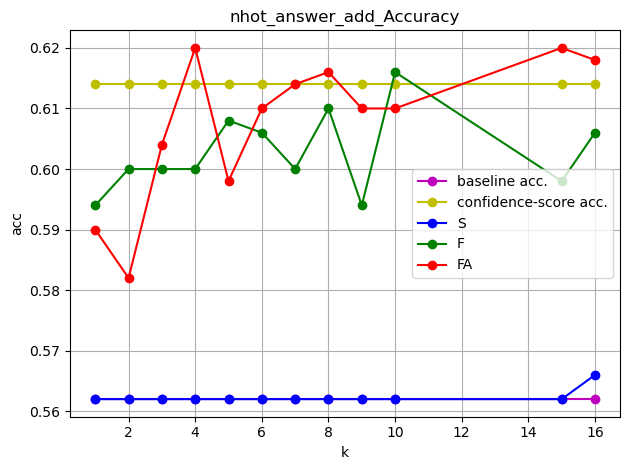

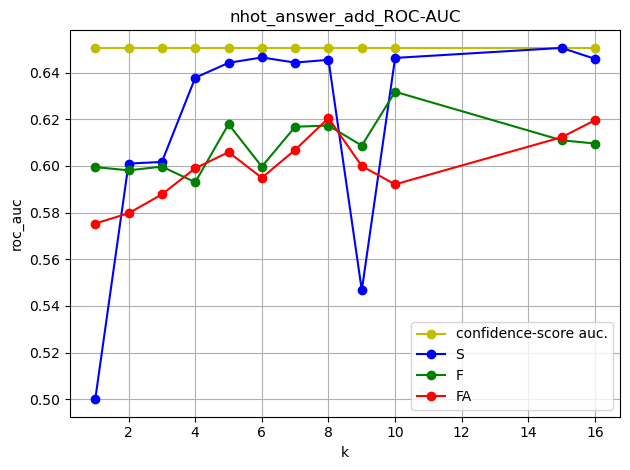

In [ ]:
result_file = f'./nhot/answer/add/result.txt'

result_dict = read_result_file(result_file)
print(result_dict)

draw_graph(result_dict, f'nhot_answer_add_Accuracy', 'acc')
draw_graph(result_dict, f'nhot_answer_add_ROC-AUC', 'roc_auc')    

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.6017, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.6378, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.6442, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.6465, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.6443, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.6455, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5467, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc

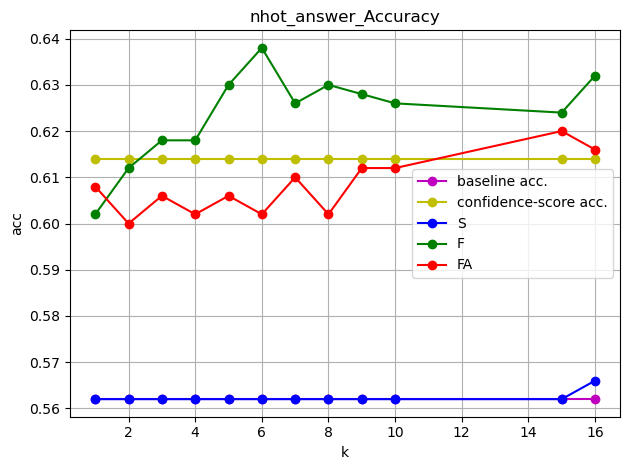

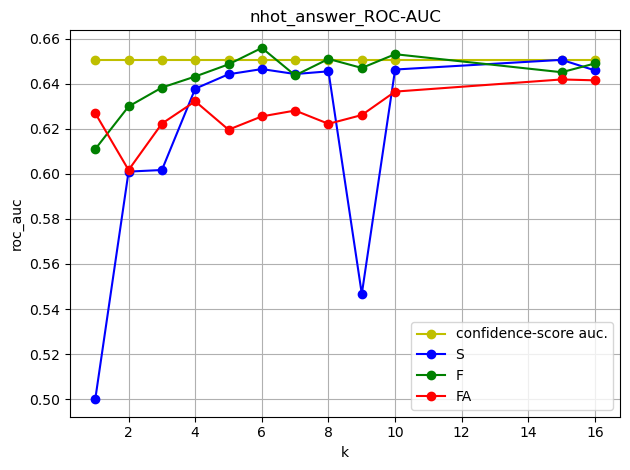

In [24]:
result_file = f'./nhot/answer/not_add/result.txt'

result_dict = read_result_file(result_file)
print(result_dict)

draw_graph(result_dict, f'nhot_answer_Accuracy', 'acc')
draw_graph(result_dict, f'nhot_answer_ROC-AUC', 'roc_auc')

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.581, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.5594, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.5726, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.5694, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.5768, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.576, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5499, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc':

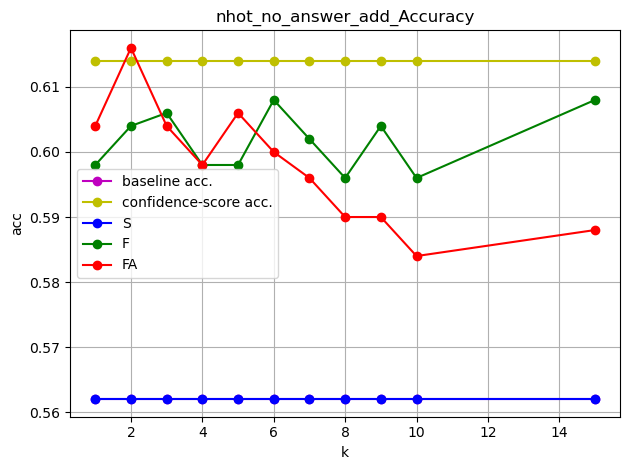

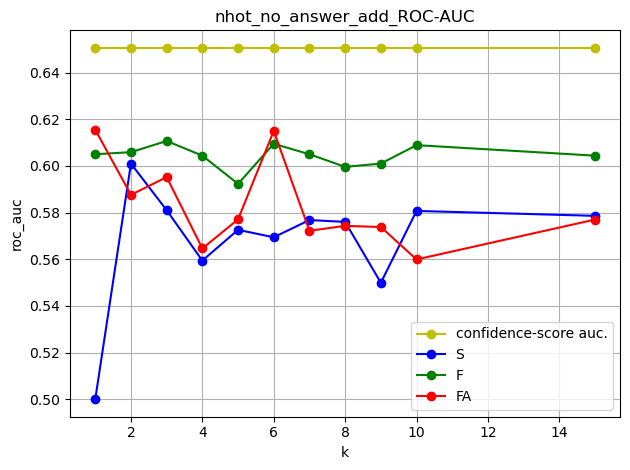

In [25]:
result_file = f'./nhot/no_answer/add/result.txt'

result_dict = read_result_file(result_file)
print(result_dict)

draw_graph(result_dict, f'nhot_no_answer_add_Accuracy', 'acc')
draw_graph(result_dict, f'nhot_no_answer_add_ROC-AUC', 'roc_auc')

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.581, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.5594, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.5726, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.5694, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.5768, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.576, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5499, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc':

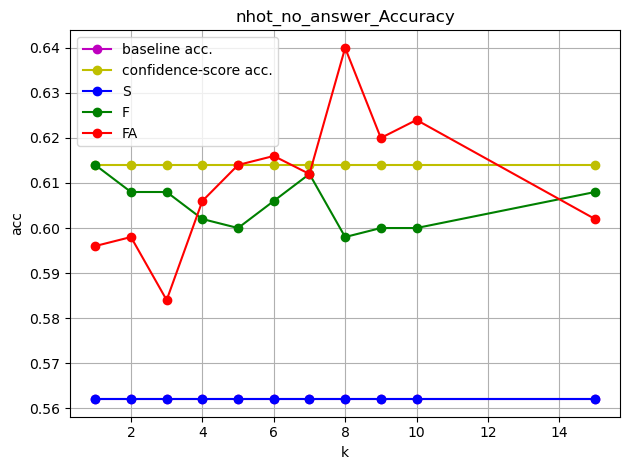

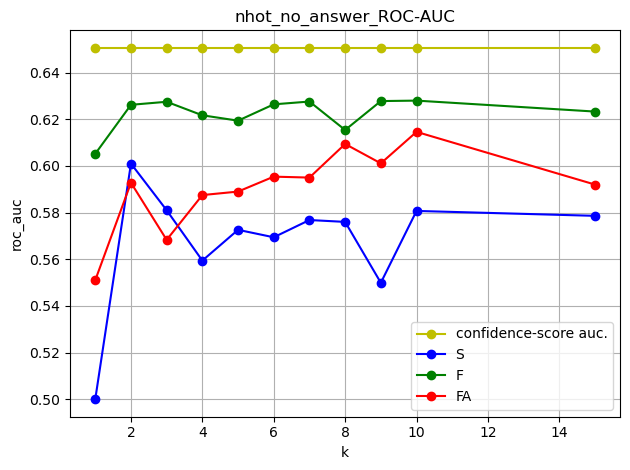

In [26]:
result_file = f'./nhot/no_answer/not_add/result.txt'

result_dict = read_result_file(result_file)
print(result_dict)

draw_graph(result_dict, f'nhot_no_answer_Accuracy', 'acc')
draw_graph(result_dict, f'nhot_no_answer_ROC-AUC', 'roc_auc')

In [58]:

def draw_graph_with_dot_baseline(data, title, y_data = 'acc', savefig=False, fig_name=None, k=list(range(1, 12)), ylim = None):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']
    labels = sorted(list(data.keys()))
    x = k
    print(x)
    plotted_label = []
    color_idx = 0

    for label in labels:
        if label in plotted_label:
            continue

        if y_data == 'acc' and label.startswith('baseline_acc'):
            baseline_acc = data[label]
            if baseline_acc < 0.5:
                baseline_acc = 1 - baseline_acc
            plt.plot(x, [baseline_acc] * len(x), linestyle='--', color = colors[color_idx])
            plotted_label.append(label)
            suffix_label = "_".join(label.split('_')[2:])
            if suffix_label in labels:
                y = []
                for k in x:
                    y.append(data[suffix_label][k][y_data])
                plt.plot(x, y, linestyle='-', color = colors[color_idx], label=suffix_label)
                plotted_label.append(suffix_label)
            color_idx += 1
        # elif '_auc' in label:
        #         pass
        elif y_data == 'acc' and label.startswith('confidence_acc'):
            confidence_acc = data['confidence_acc']
            plt.plot(x, [confidence_acc] * len(x), linestyle='--', color = colors[color_idx], label='confidence_acc')
            plotted_label.append(label)
            color_idx += 1
        elif y_data == 'roc_auc' and label.startswith('confidence_auc'):
            confidence_auc = data['confidence_auc']
            plt.plot(x, [confidence_auc] * len(x), linestyle='--', color = colors[color_idx], label = 'confidence_roc_auc')
            plotted_label.append(label)
            color_idx += 1
        elif not label.startswith('baseline') and not label.startswith('confidence'):
            print(label)
            y = []
            for k in x:
                y.append(data[label][k][y_data])
            plt.plot(x, y, linestyle='-', color=colors[color_idx], label=label)
            plotted_label.append(label)
            color_idx += 1

    
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel(y_data)
    plt.xticks(x)

    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'./graphs/{fig_name}')
    plt.show()
    
    

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.6017, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.6378, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.6442, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.6465, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.6443, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.6455, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5467, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc

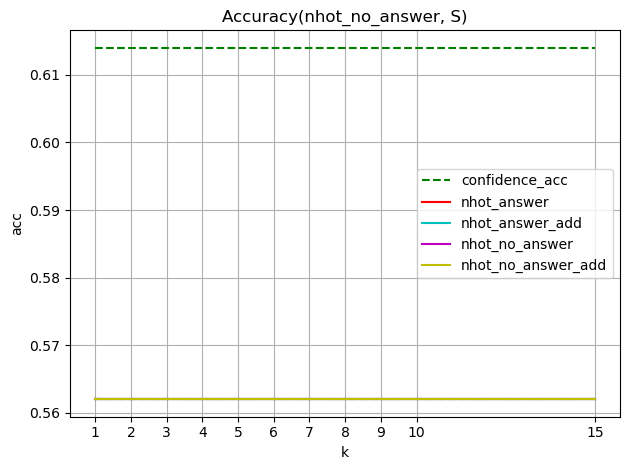

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
nhot_answer
nhot_answer_add
nhot_no_answer
nhot_no_answer_add


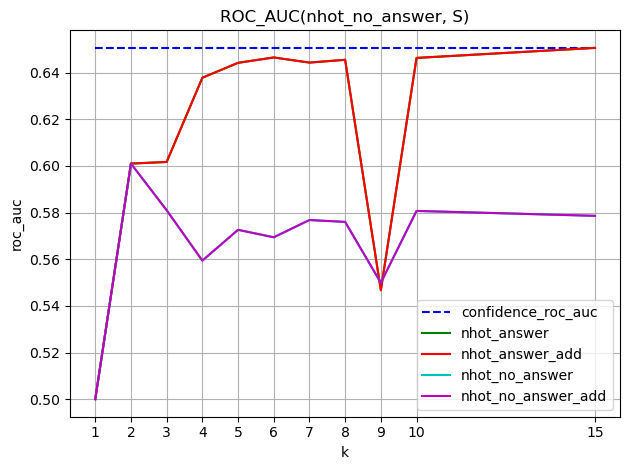

In [59]:
result_dict_for_graph = {}

result_files_label = {
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/answer/add/result.txt": 'nhot_answer_add',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/answer/not_add/result.txt": 'nhot_answer',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/no_answer/add/result.txt": 'nhot_no_answer_add',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/no_answer/not_add/result.txt": 'nhot_no_answer'
}
for rf, label in result_files_label.items():
    result = read_result_file(rf)
    result_dict_for_graph[label] = result['S']
result_dict_for_graph['baseline_acc'] = result['baseline_acc']
result_dict_for_graph['confidence_acc'] = result['confidence_acc']
result_dict_for_graph['confidence_auc'] = result['confidence_auc']
    
draw_graph_with_dot_baseline(result_dict_for_graph, f'Accuracy({label}, S)', fig_name = f'{label}_acc_S.png', y_data='acc', k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])
draw_graph_with_dot_baseline(result_dict_for_graph, f'ROC_AUC({label}, S)', fig_name = f'{label}_auc_S.png', y_data='roc_auc', k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])
# draw_graph_with_dot_baseline(result_dict_for_graph, 'ROC_AUC(19 actions)', fig_name = 'only_action_20_processed_response.png', y_data='roc_auc', k=[5, 10, 15, 20, 25, 30, 35, 40])

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.6017, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.6378, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.6442, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.6465, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.6443, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.6455, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5467, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc

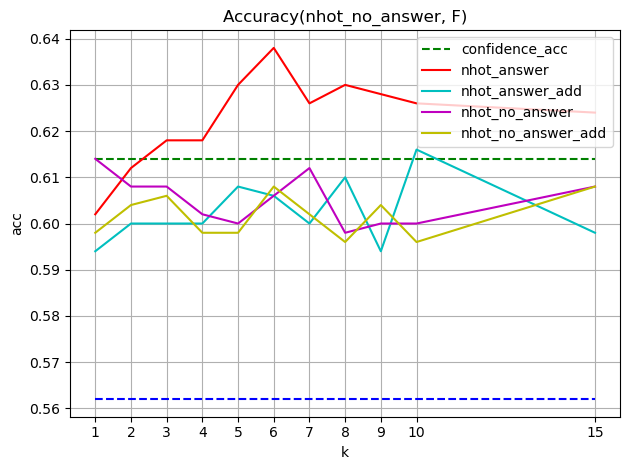

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
nhot_answer
nhot_answer_add
nhot_no_answer
nhot_no_answer_add


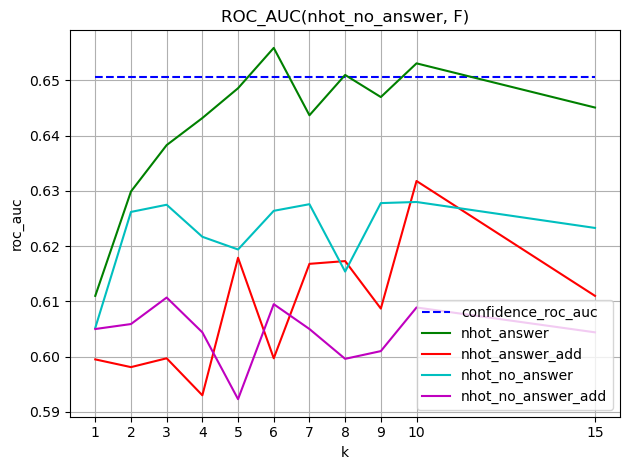

In [60]:
result_dict_for_graph = {}

result_files_label = {
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/answer/add/result.txt": 'nhot_answer_add',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/answer/not_add/result.txt": 'nhot_answer',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/no_answer/add/result.txt": 'nhot_no_answer_add',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/no_answer/not_add/result.txt": 'nhot_no_answer'
}
for rf, label in result_files_label.items():
    result = read_result_file(rf)
    result_dict_for_graph[label] = result['F']
result_dict_for_graph['baseline_acc'] = result['baseline_acc']
result_dict_for_graph['confidence_acc'] = result['confidence_acc']
result_dict_for_graph['confidence_auc'] = result['confidence_auc']
    
draw_graph_with_dot_baseline(result_dict_for_graph, f'Accuracy({label}, F)', fig_name = f'{label}_acc_F.png', y_data='acc', k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])
draw_graph_with_dot_baseline(result_dict_for_graph, f'ROC_AUC({label}, F)', fig_name = f'{label}_auc_F.png', y_data='roc_auc', k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])
# draw_graph_with_dot_baseline(result_dict_for_graph, 'ROC_AUC(19 actions)', fig_name = 'only_action_20_processed_response.png', y_data='roc_auc', k=[5, 10, 15, 20, 25, 30, 35, 40])

{'confidence_acc': 0.614, 'confidence_auc': 0.6506, 'baseline_acc': 0.43799999999999994, 'S': {1: {'acc': 0.562, 'roc_auc': 0.5, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 2: {'acc': 0.562, 'roc_auc': 0.601, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 3: {'acc': 0.562, 'roc_auc': 0.6017, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 4: {'acc': 0.562, 'roc_auc': 0.6378, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 5: {'acc': 0.562, 'roc_auc': 0.6442, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 6: {'acc': 0.562, 'roc_auc': 0.6465, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 7: {'acc': 0.562, 'roc_auc': 0.6443, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 8: {'acc': 0.562, 'roc_auc': 0.6455, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 9: {'acc': 0.562, 'roc_auc': 0.5467, 'precision': 0.562, 'recall': 1.0, 'npv': 0.0, 'spec': 0.0}, 10: {'acc': 0.562, 'roc_auc

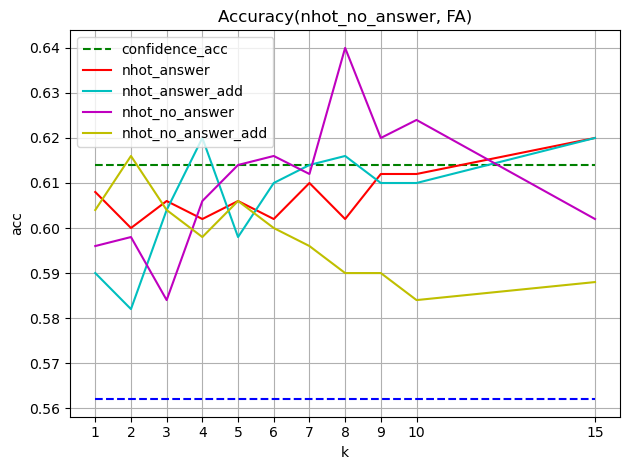

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
nhot_answer
nhot_answer_add
nhot_no_answer
nhot_no_answer_add


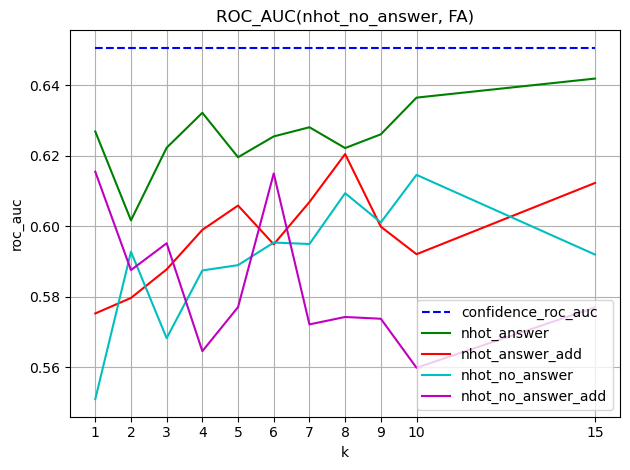

In [61]:
result_dict_for_graph = {}

result_files_label = {
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/answer/add/result.txt": 'nhot_answer_add',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/answer/not_add/result.txt": 'nhot_answer',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/no_answer/add/result.txt": 'nhot_no_answer_add',
    "/home/kimnal0/auto-code-rover/atropos/results/nhot/no_answer/not_add/result.txt": 'nhot_no_answer'
}
for rf, label in result_files_label.items():
    result = read_result_file(rf)
    result_dict_for_graph[label] = result['FA']
result_dict_for_graph['baseline_acc'] = result['baseline_acc']
result_dict_for_graph['confidence_acc'] = result['confidence_acc']
result_dict_for_graph['confidence_auc'] = result['confidence_auc']
    
draw_graph_with_dot_baseline(result_dict_for_graph, f'Accuracy({label}, FA)', fig_name = f'{label}_acc_FA.png', y_data='acc', k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])
draw_graph_with_dot_baseline(result_dict_for_graph, f'ROC_AUC({label}, FA)', fig_name = f'{label}_auc_FA.png', y_data='roc_auc', k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])
# draw_graph_with_dot_baseline(result_dict_for_graph, 'ROC_AUC(19 actions)', fig_name = 'only_action_20_processed_response.png', y_data='roc_auc', k=[5, 10, 15, 20, 25, 30, 35, 40])